In [17]:
from helper import plot_metrics, read_dict

env: (20x20, max_step=1000) all strategy

reward scelta best pov:
- 1 * visita cella con stima sbagliata osservata
- 8 * visita cella osservata dalla posizione migliore
- -2 se l'agente sta fermo 

reward massimizzazione IG:
- somma dell'IG di ogni cella attraversata

# Train data

In [41]:
train_data_entropy = read_dict(file_path=f"./data/policy1_entropy/train_data_entropy_cnn.json")
train_data_loss = read_dict(file_path=f"./data/policy1_loss/train_data_loss_cnn.json")
train_data_random = read_dict(file_path=f"./data/policy1_random/train_data_random_cnn.json")
train_data_ig_reward = read_dict(file_path=f"./data/policy2_ig_reward/train_data_ig_reward_cnn.json")
train_data_ig_reward_curriculum = read_dict(file_path=f"./data/policy2_ig_reward_curriculum/train_data_ig_reward_curriculum_mlp.json")

In [22]:
max_cells = 400

In [23]:
train_data_entropy.keys()

dict_keys(['episode_rewards', 'episode_cells_marker_pred_1', 'episode_cells_seen_pov', 'episode_steps'])

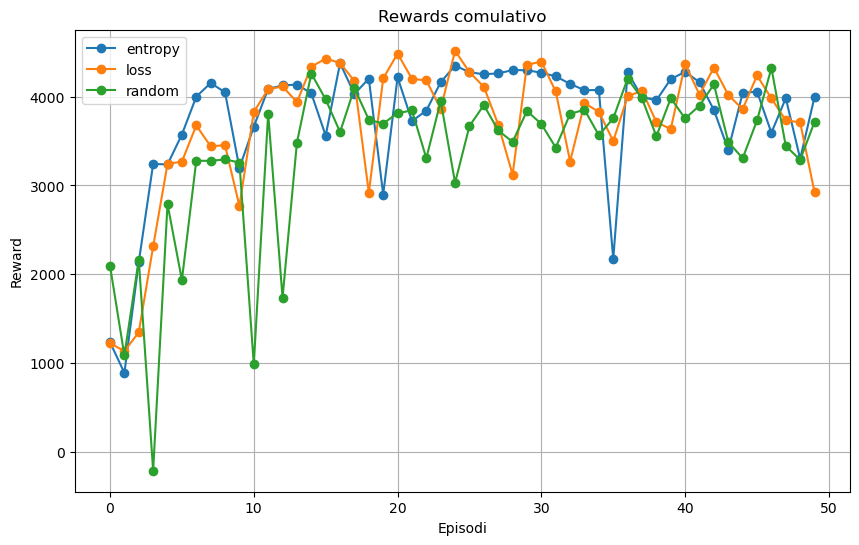

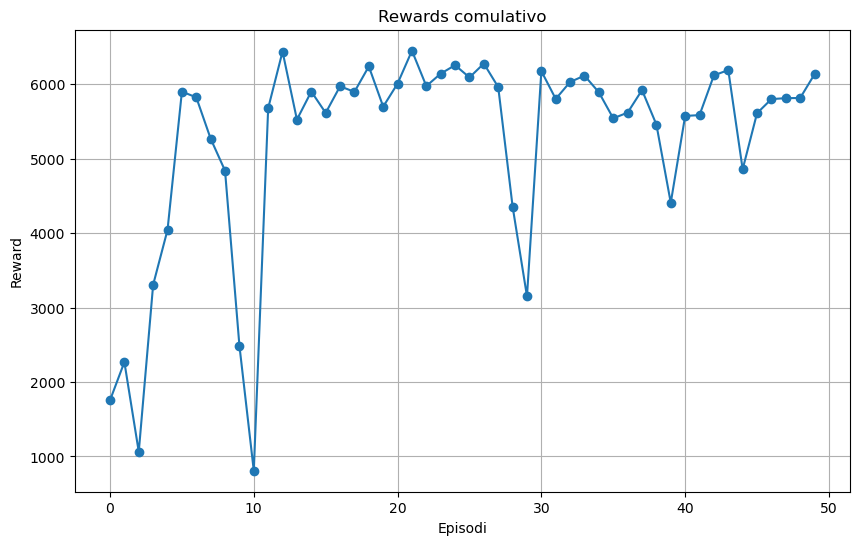

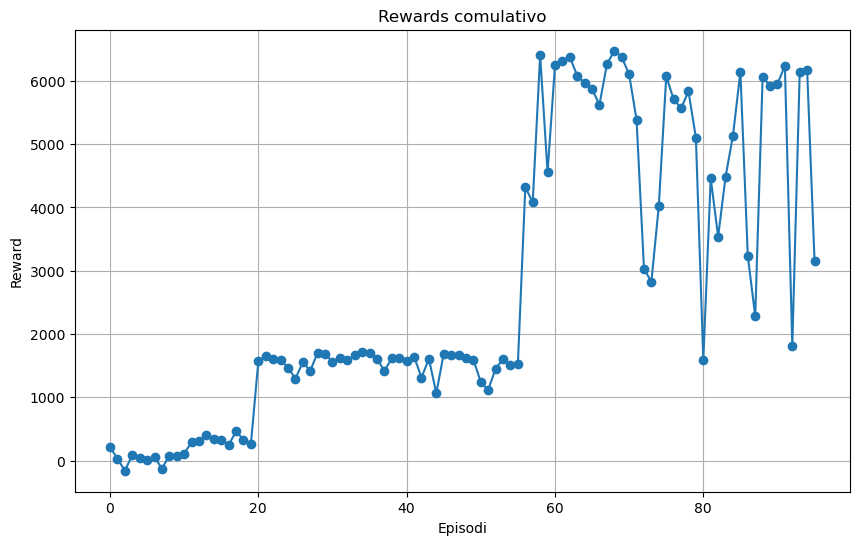

In [24]:
train_data_policy_best_pov = [train_data_entropy['episode_rewards'], train_data_loss['episode_rewards'], train_data_random['episode_rewards']]
train_data_policy_ig = [train_data_ig_reward['episode_rewards']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_rewards']]

plot_metrics(train_data_policy_best_pov,
             title="Rewards comulativo",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"])

plot_metrics(train_data_policy_ig,
             title="Rewards comulativo",
             ylabel="Reward",
             xlabel="Episodi")

plot_metrics(train_data_policy_ig_curriculum,
             title="Rewards comulativo",
             ylabel="Reward",
             xlabel="Episodi")

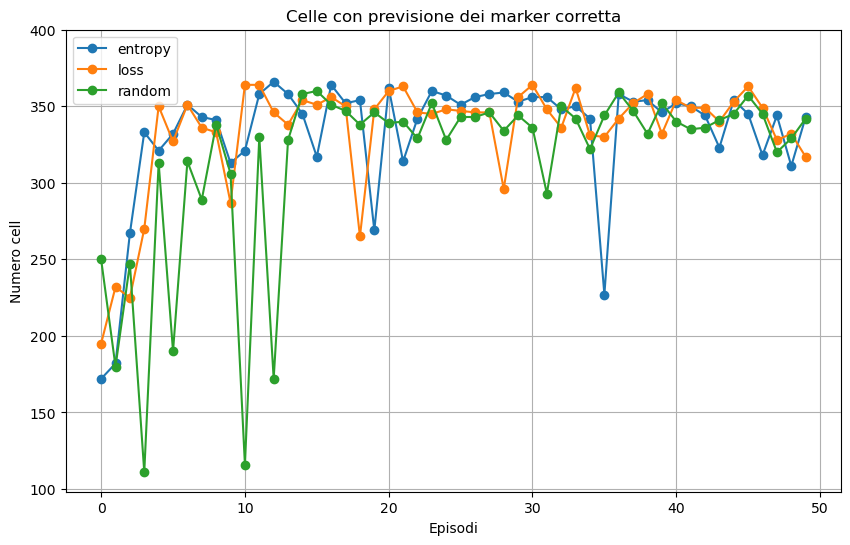

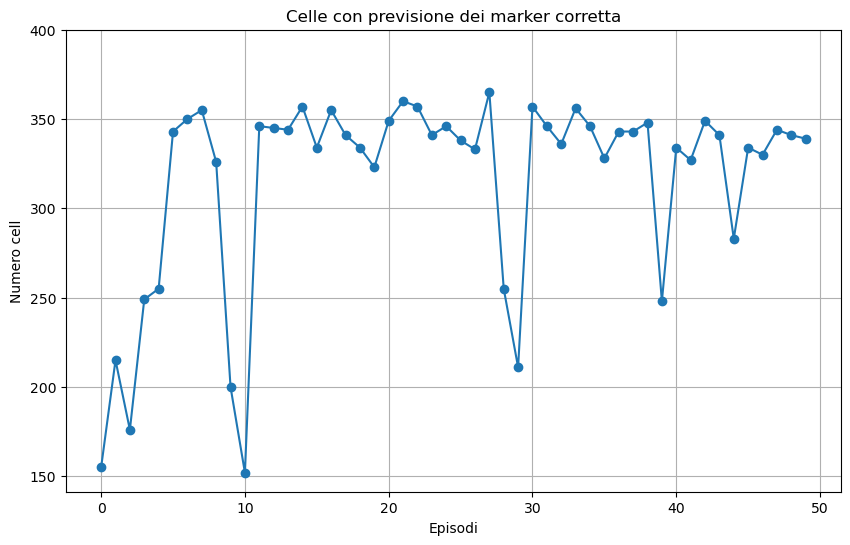

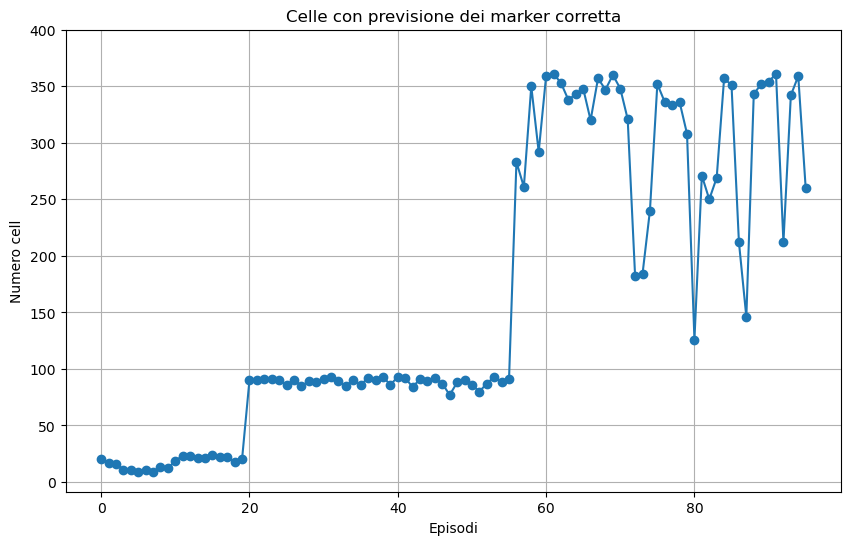

In [25]:
train_data_policy_best_pov = [train_data_entropy['episode_cells_marker_pred_1'], train_data_loss['episode_cells_marker_pred_1'], train_data_random['episode_cells_marker_pred_1']]
train_data_policy_ig = [train_data_ig_reward['episode_cells_marker_pred_1']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_cells_marker_pred_1']]

plot_metrics(train_data_policy_best_pov,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero cell",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"],
             max_y=max_cells)

plot_metrics(train_data_policy_ig,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero cell",
             xlabel="Episodi",
             max_y=max_cells)

plot_metrics(train_data_policy_ig_curriculum,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero cell",
             xlabel="Episodi",
             max_y=max_cells)

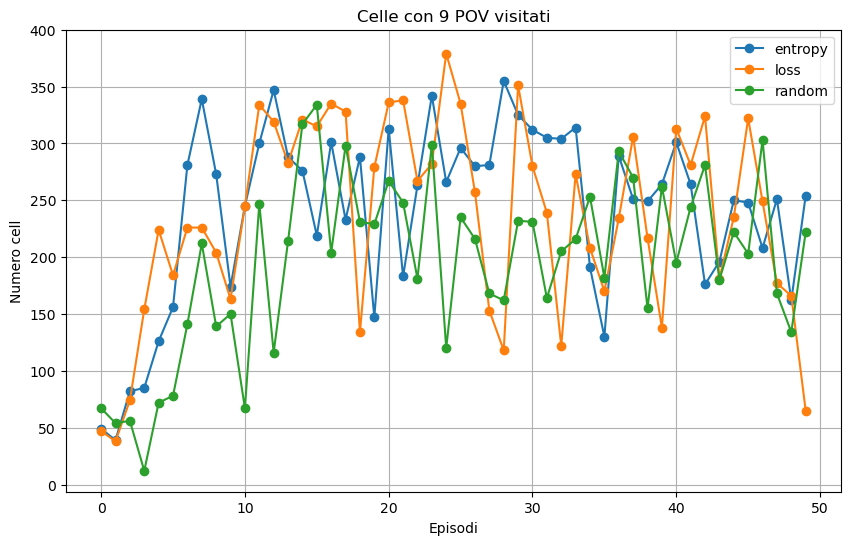

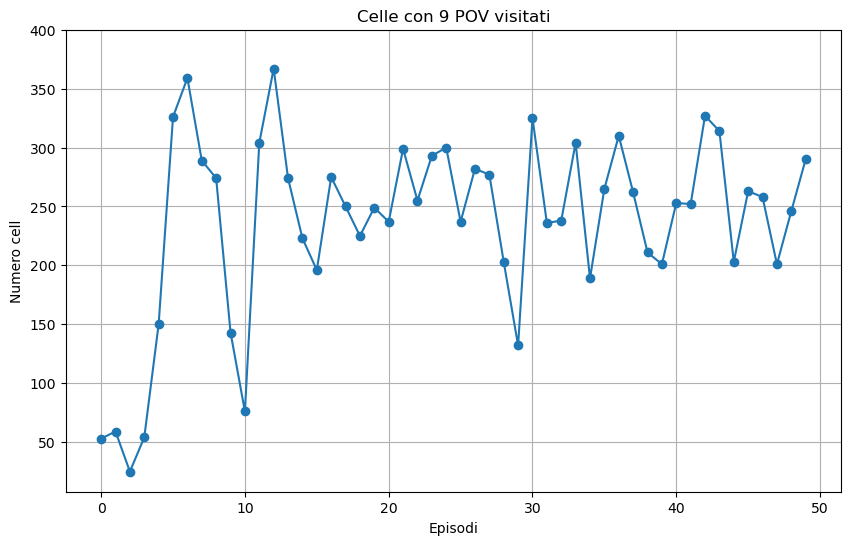

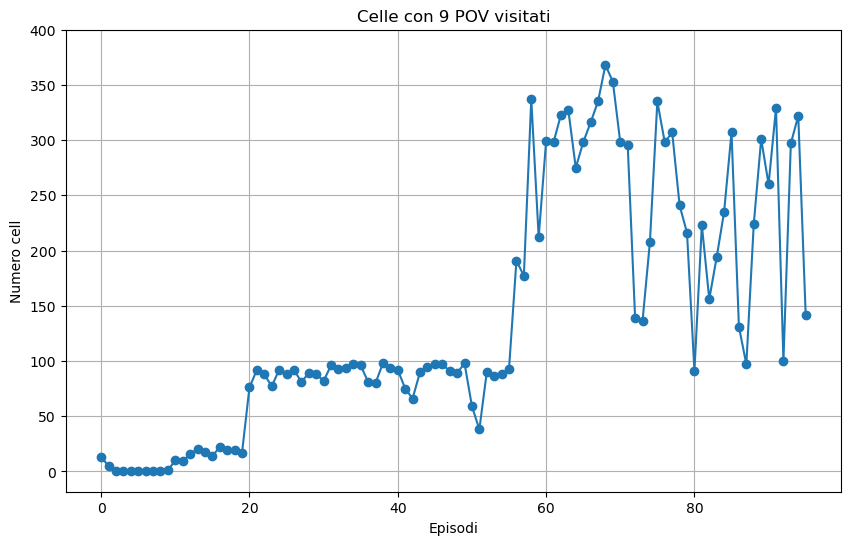

In [26]:
train_data_policy_best_pov = [train_data_entropy['episode_cells_seen_pov'], train_data_loss['episode_cells_seen_pov'], train_data_random['episode_cells_seen_pov']]
train_data_policy_ig = [train_data_ig_reward['episode_cells_seen_pov']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_cells_seen_pov']]

plot_metrics(train_data_policy_best_pov,
             title="Celle con 9 POV visitati",
             ylabel="Numero cell",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"],
             max_y=max_cells)

plot_metrics(train_data_policy_ig,
             title="Celle con 9 POV visitati",
             ylabel="Numero cell",
             xlabel="Episodi",
             max_y=max_cells)

plot_metrics(train_data_policy_ig_curriculum,
             title="Celle con 9 POV visitati",
             ylabel="Numero cell",
             xlabel="Episodi",
             max_y=max_cells)

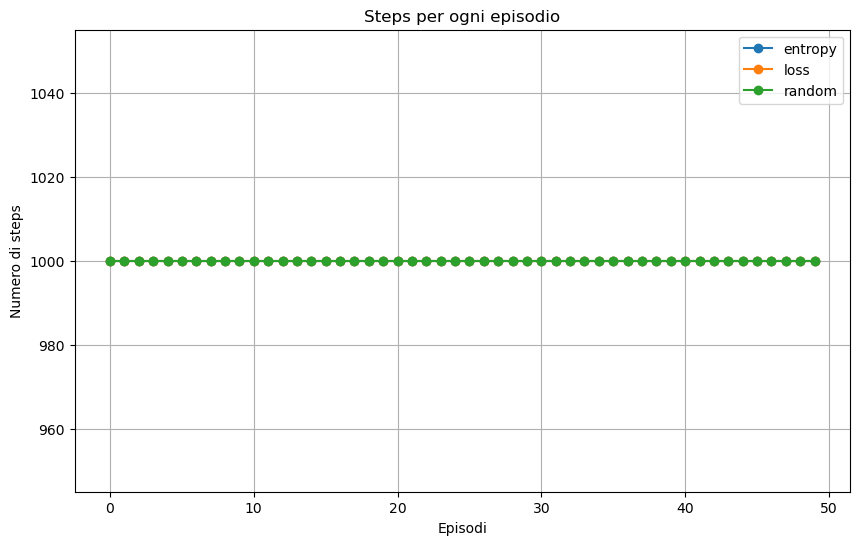

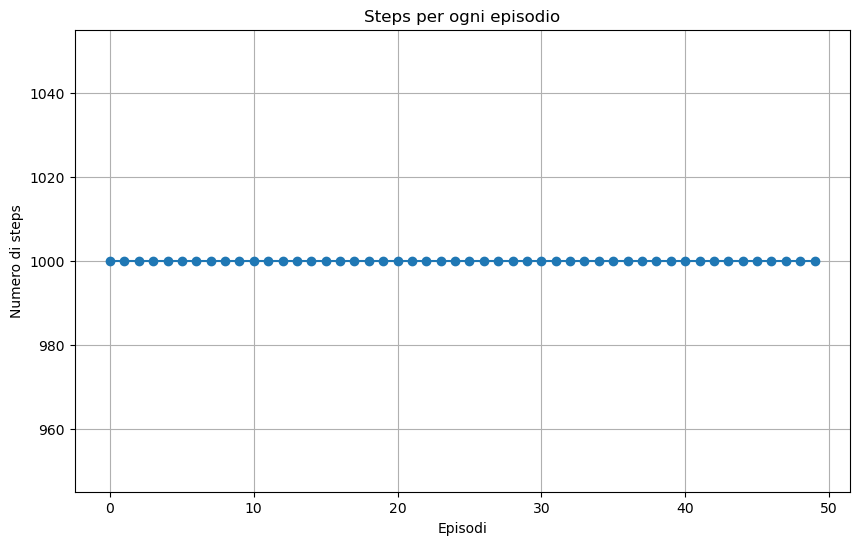

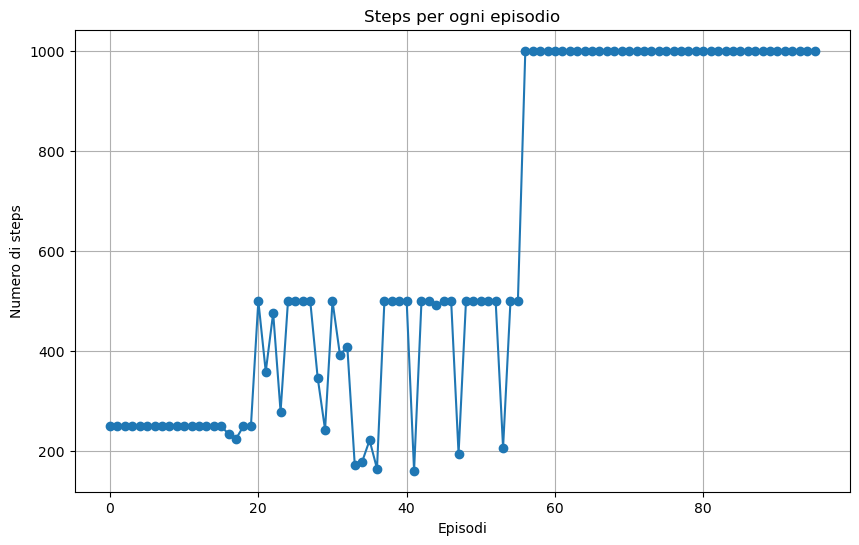

In [27]:
train_data_policy_best_pov = [train_data_entropy['episode_steps'], train_data_loss['episode_steps'], train_data_random['episode_steps']]
train_data_policy_ig = [train_data_ig_reward['episode_steps']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_steps']]

plot_metrics(train_data_policy_best_pov,
             title="Steps per ogni episodio",
             ylabel="Numero di steps",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"])

plot_metrics(train_data_policy_ig,
             title="Steps per ogni episodio",
             ylabel="Numero di steps",
             xlabel="Episodi")

plot_metrics(train_data_policy_ig_curriculum,
             title="Steps per ogni episodio",
             ylabel="Numero di steps",
             xlabel="Episodi")

# Test data

In [43]:
test_data_entropy = read_dict(file_path=f"./data/policy1_entropy/test_data_entropy_cnn.json")
test_data_loss = read_dict(file_path=f"./data/policy1_loss/test_data_loss_cnn.json")
test_data_random = read_dict(file_path=f"./data/policy1_random/test_data_random_cnn.json")
test_data_ig_reward = read_dict(file_path=f"./data/policy2_ig_reward/test_data_ig_reward_cnn.json")
test_data_ig_reward_curriculum = read_dict(file_path=f"./data/policy2_ig_reward_curriculum/test_data_ig_reward_curriculum_mlp.json")
test_data_random_agent = read_dict(file_path=f"./data/random_agent/test_data_random_agent_2025-03-07_12-22-49.json")
test_data_no_train = read_dict(file_path=f"data/no_train/test_data_no_train_2025-03-05_12-03-41.json")

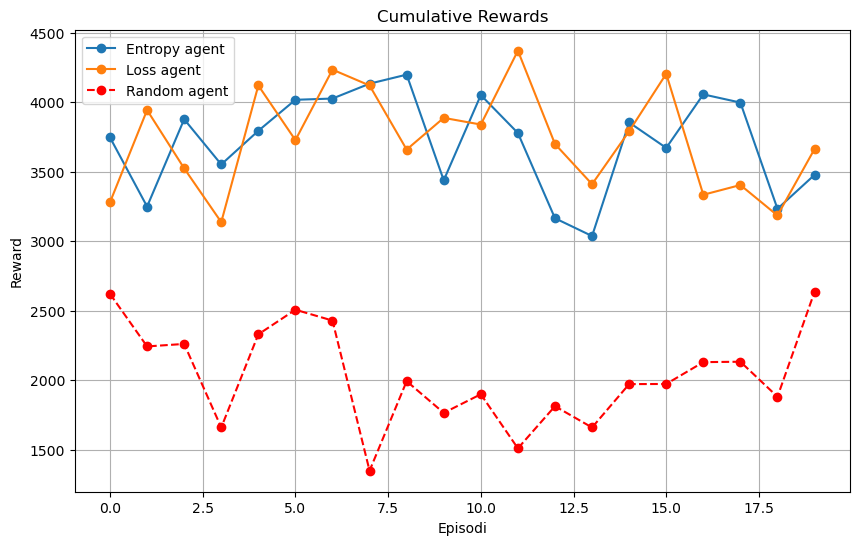

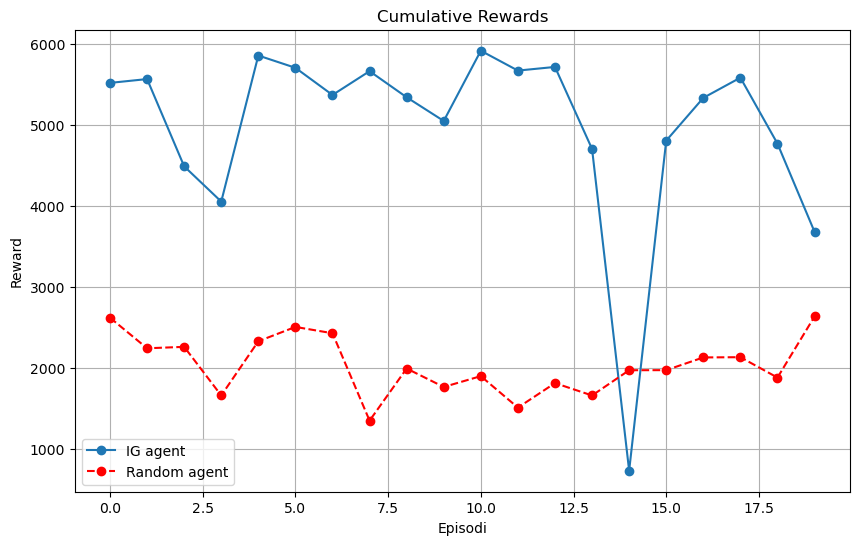

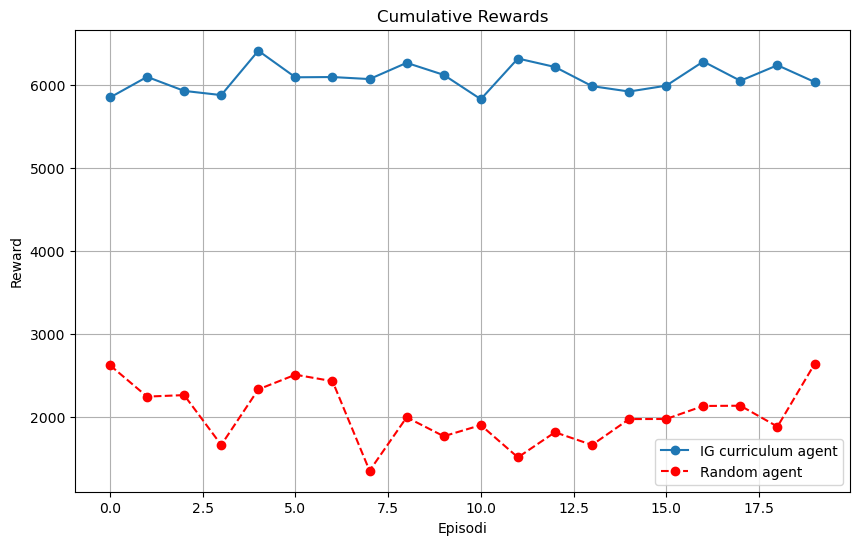

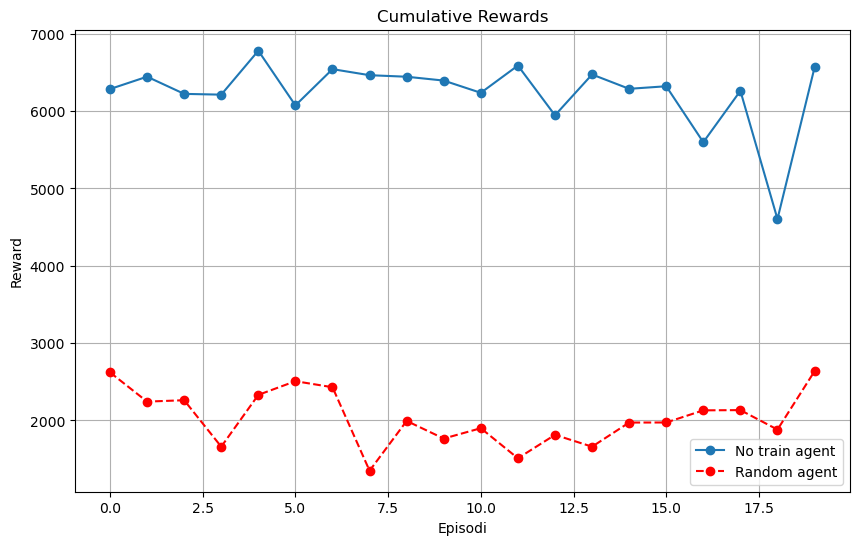

In [32]:
test_data_policy_best_pov = [test_data_entropy['cumulative_rewards_per_run'], test_data_loss['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
test_data_policy_ig = [test_data_ig_reward['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
test_data_policy_no_train = [test_data_no_train['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]

plot_metrics(test_data_policy_best_pov,
             title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"])

plot_metrics(test_data_policy_ig,
             title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["IG agent", "Random agent"])

plot_metrics(test_data_policy_ig_curriculum,
             title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["IG curriculum agent", "Random agent"])

plot_metrics(test_data_policy_no_train,
                title="Cumulative Rewards",
                ylabel="Reward",
                xlabel="Episodi",
                legend_labels=["No train agent", "Random agent"])

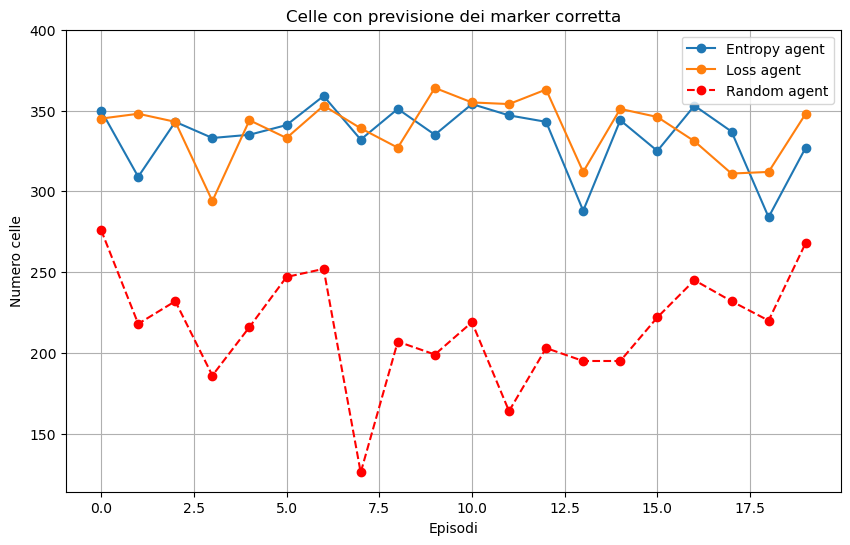

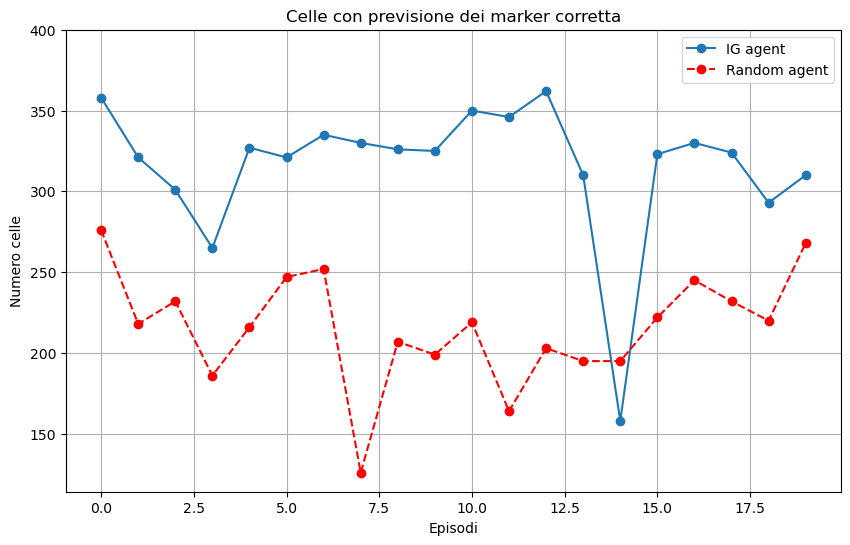

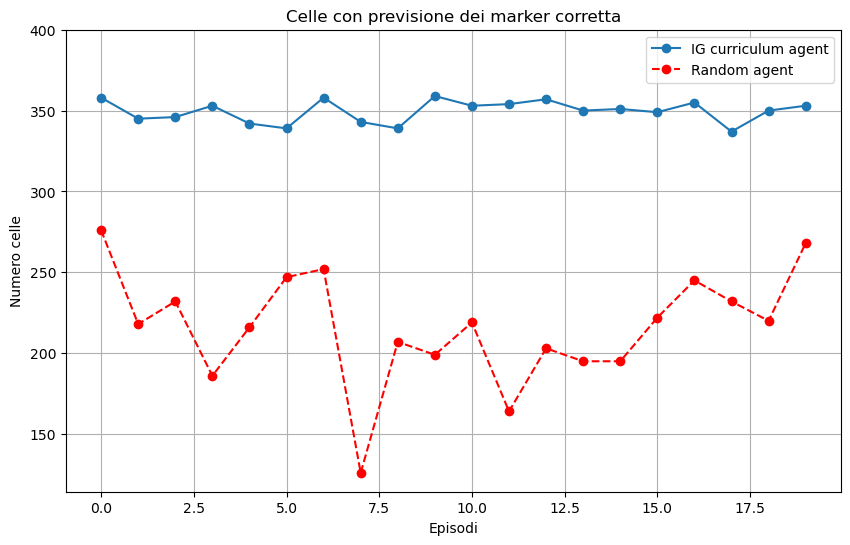

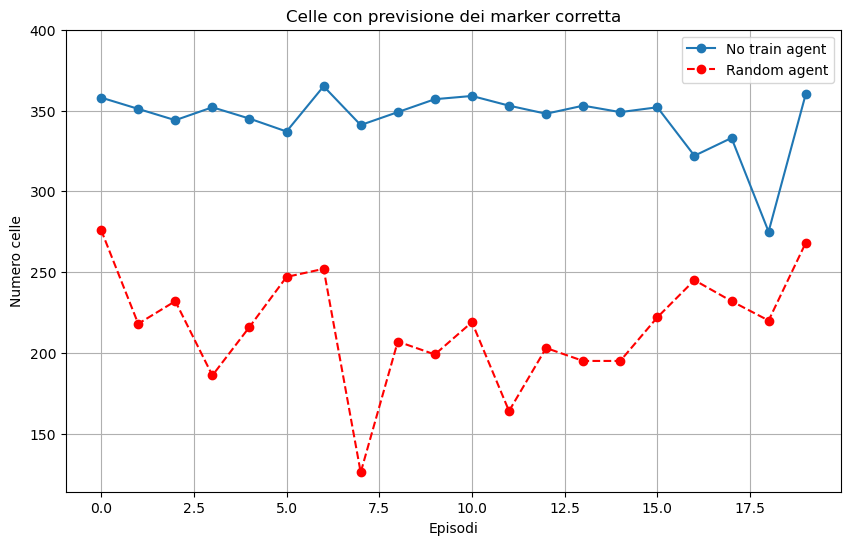

In [31]:
test_data_policy_best_pov = [test_data_entropy['cells_marker_pred_1_per_run'], test_data_loss['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
test_data_policy_ig = [test_data_ig_reward['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
test_data_no_train_cell_pred = [test_data_no_train['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]

plot_metrics(test_data_policy_best_pov,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"],
             max_y=max_cells)

plot_metrics(test_data_policy_ig,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["IG agent", "Random agent"],
             max_y=max_cells)

plot_metrics(test_data_policy_ig_curriculum,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["IG curriculum agent", "Random agent"],
             max_y=max_cells)

plot_metrics(test_data_no_train_cell_pred,
            title="Celle con previsione dei marker corretta",
            ylabel="Numero celle",
            xlabel="Episodi",
            legend_labels=["No train agent", "Random agent"],
            max_y=max_cells)

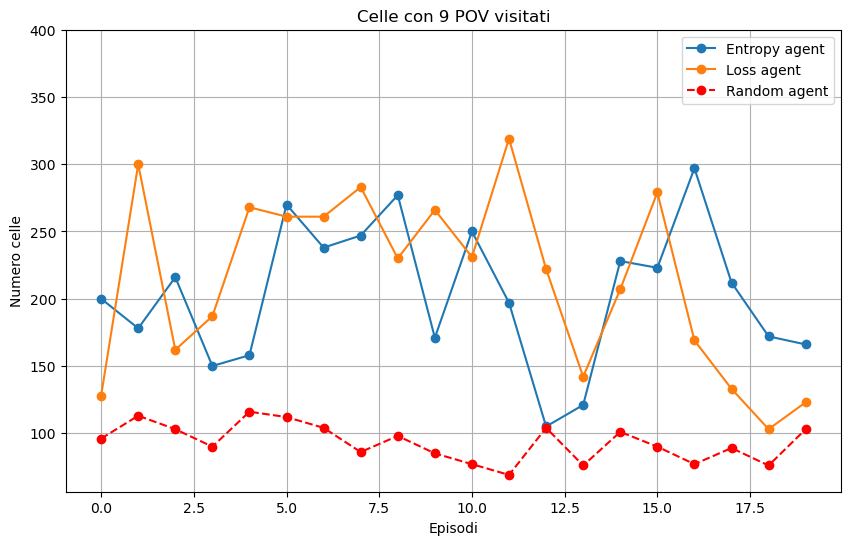

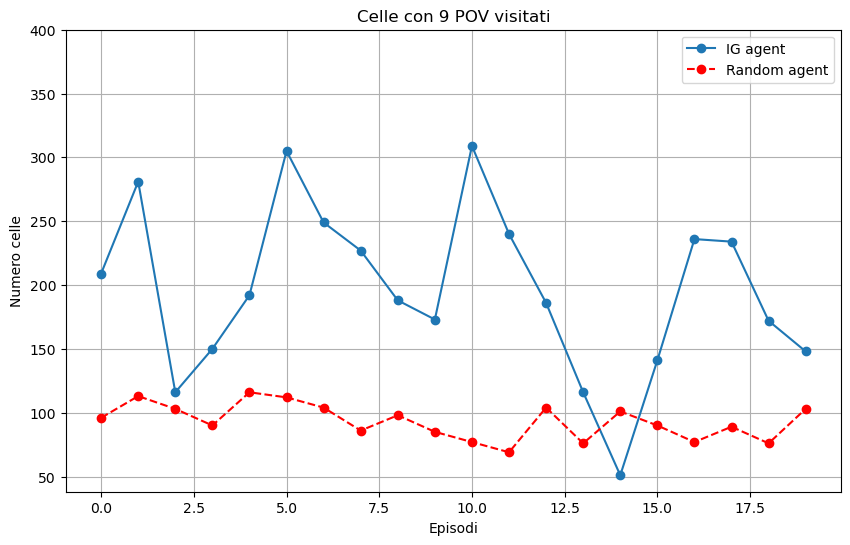

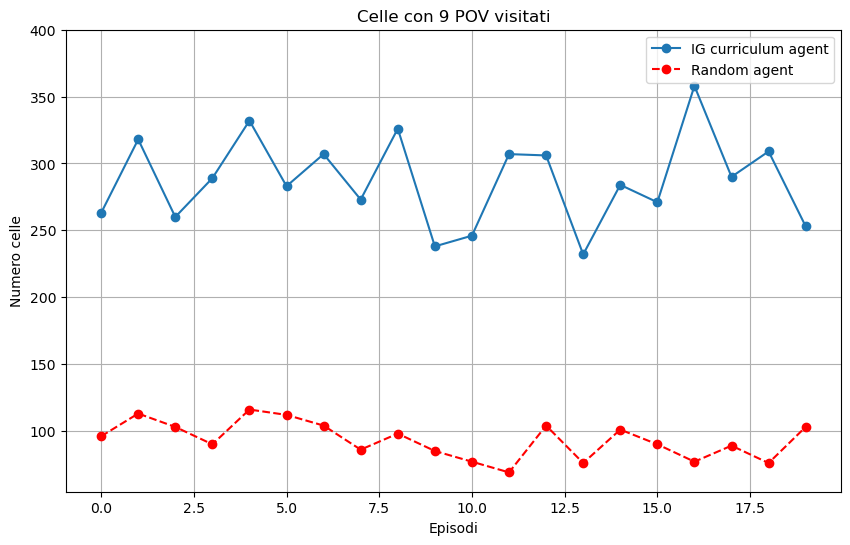

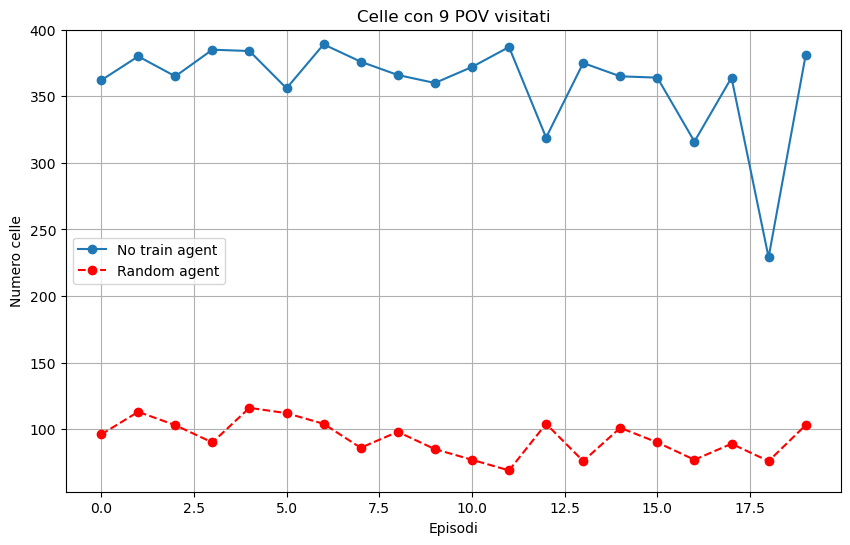

In [33]:
test_data_policy_best_pov = [test_data_entropy['cells_seen_pov_per_run'], test_data_loss['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]
test_data_policy_ig = [test_data_ig_reward['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]
test_data_no_train_cells_seen = [test_data_no_train['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]

plot_metrics(test_data_policy_best_pov,
             title="Celle con 9 POV visitati",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"],
             max_y=max_cells)

plot_metrics(test_data_policy_ig,
             title="Celle con 9 POV visitati",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["IG agent", "Random agent"],
             max_y=max_cells)

plot_metrics(test_data_policy_ig_curriculum,
             title="Celle con 9 POV visitati",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["IG curriculum agent", "Random agent"],
             max_y=max_cells)

plot_metrics(test_data_no_train_cells_seen,
             title="Celle con 9 POV visitati",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["No train agent", "Random agent"],
             max_y=max_cells)
             

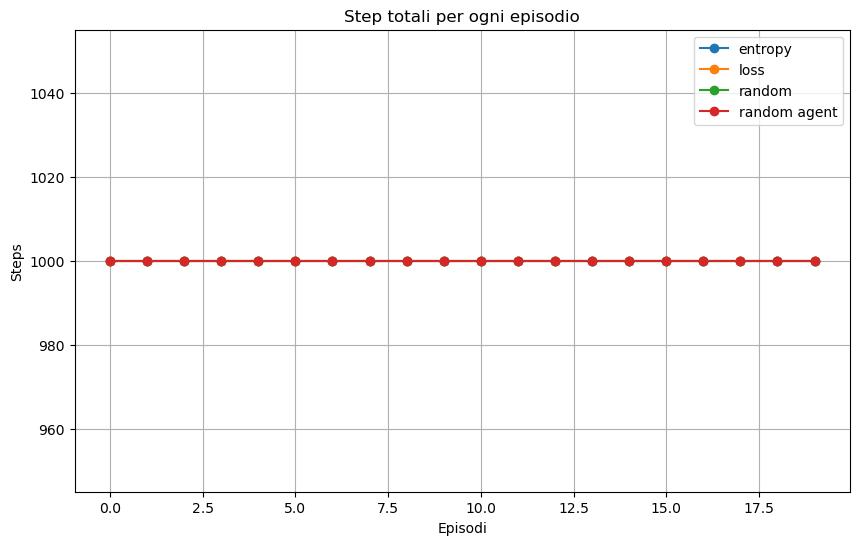

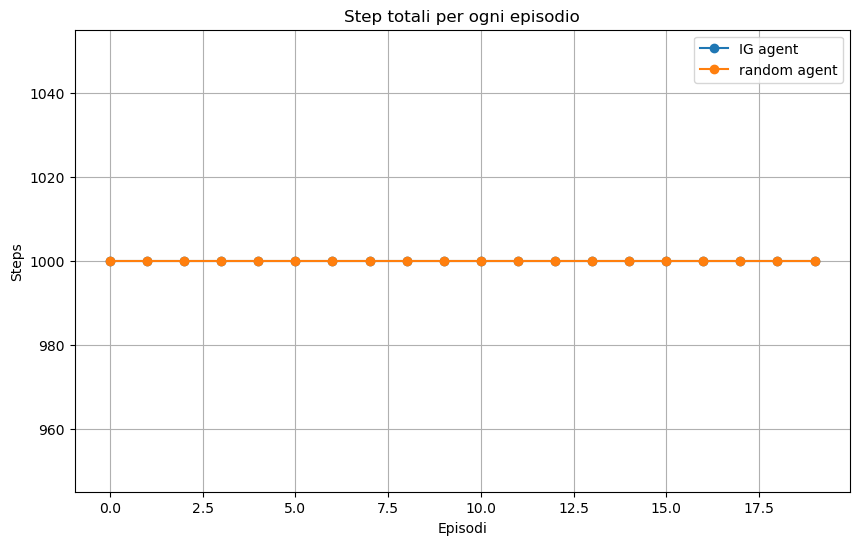

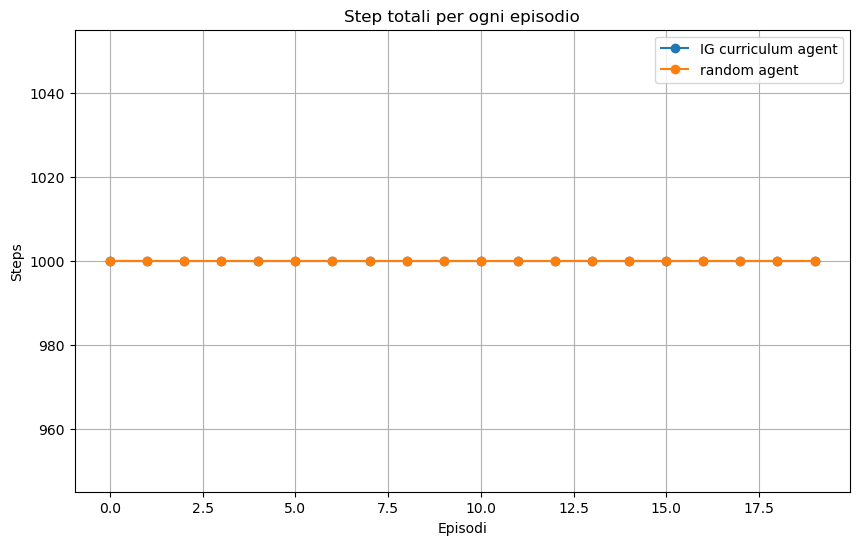

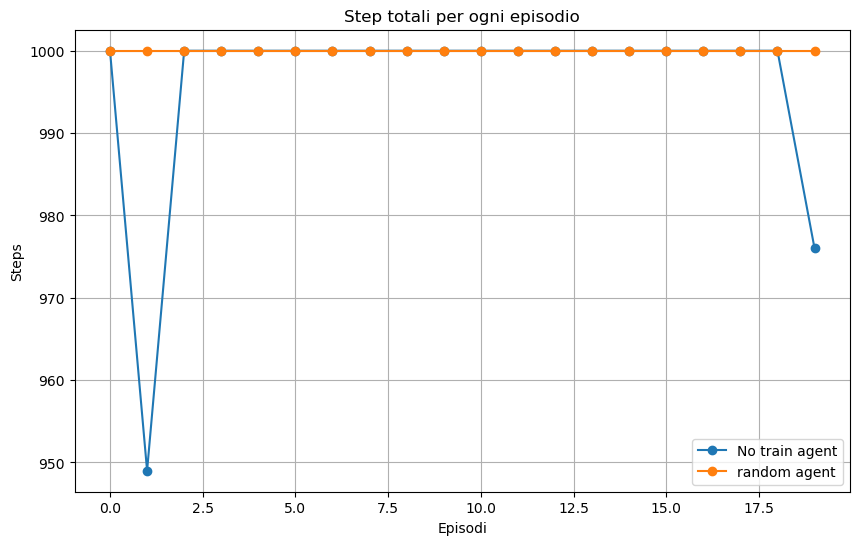

In [34]:
test_data_policy_best_pov = [test_data_entropy['total_steps_per_run'], test_data_loss['total_steps_per_run'], test_data_random['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]
test_data_policy_ig = [test_data_ig_reward['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]
test_data_policy_no_train = [test_data_no_train['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]

plot_metrics(test_data_policy_best_pov,
             title="Step totali per ogni episodio",
             ylabel="Steps",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random", "random agent"])

plot_metrics(test_data_policy_ig,
                title="Step totali per ogni episodio",
                ylabel="Steps",
                xlabel="Episodi",
                legend_labels=["IG agent", "random agent"])

plot_metrics(test_data_policy_ig_curriculum,
                title="Step totali per ogni episodio",
                ylabel="Steps",
                xlabel="Episodi",
                legend_labels=["IG curriculum agent", "random agent"])

plot_metrics(test_data_policy_no_train,
                title="Step totali per ogni episodio",
                ylabel="Steps",
                xlabel="Episodi",
                legend_labels=["No train agent", "random agent"])

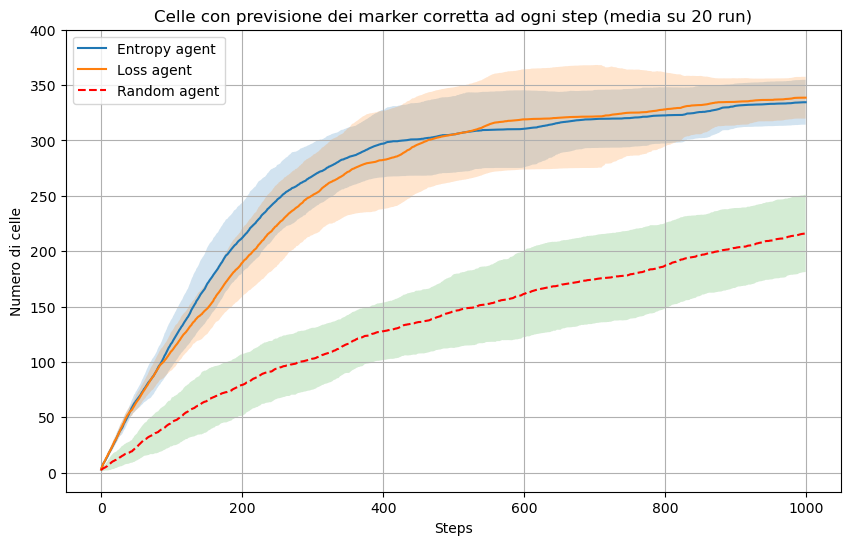

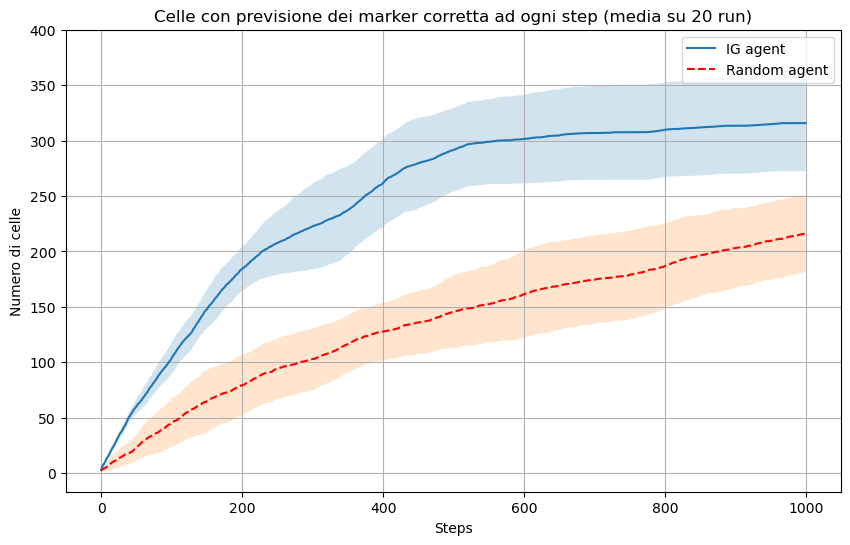

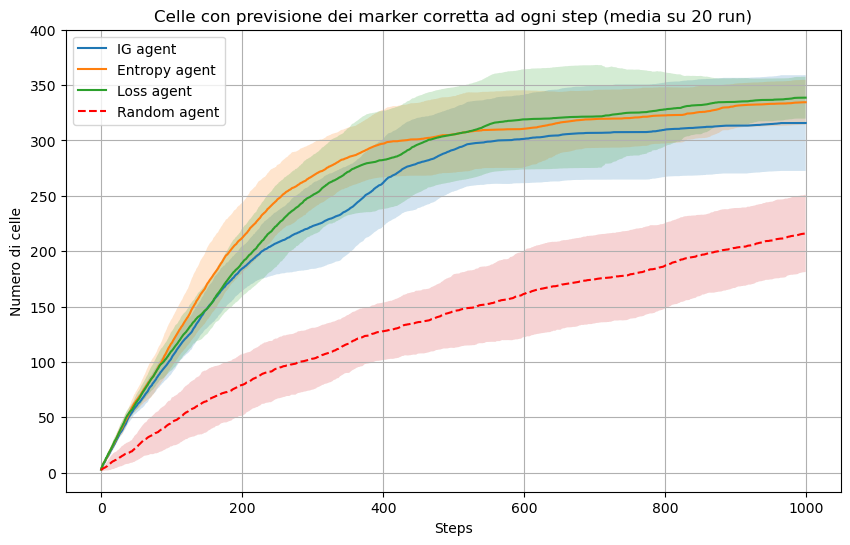

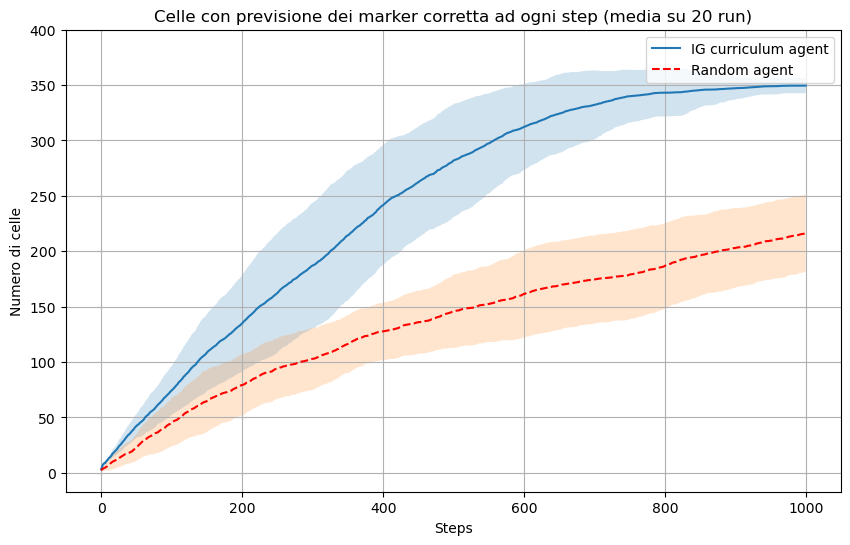

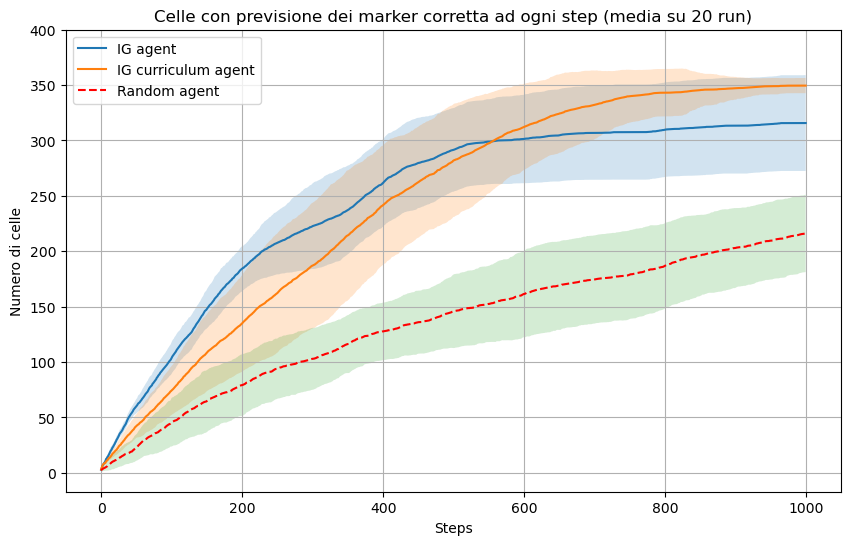

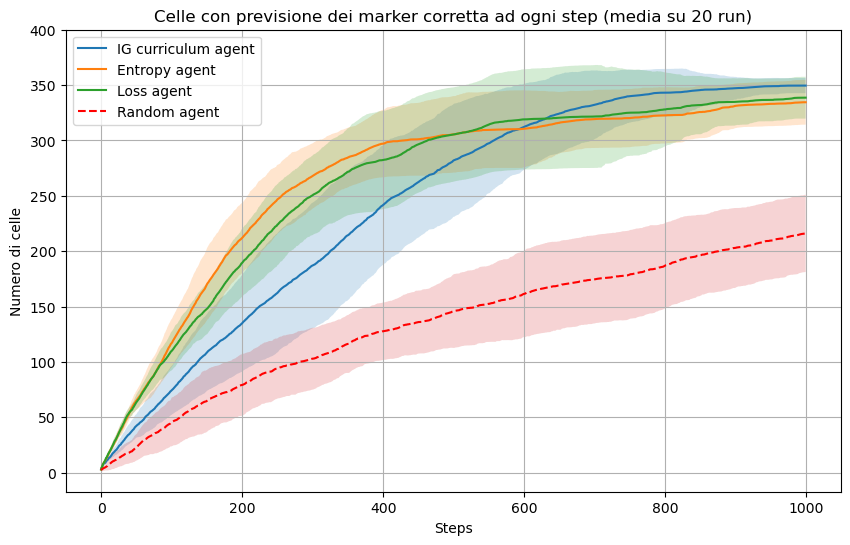

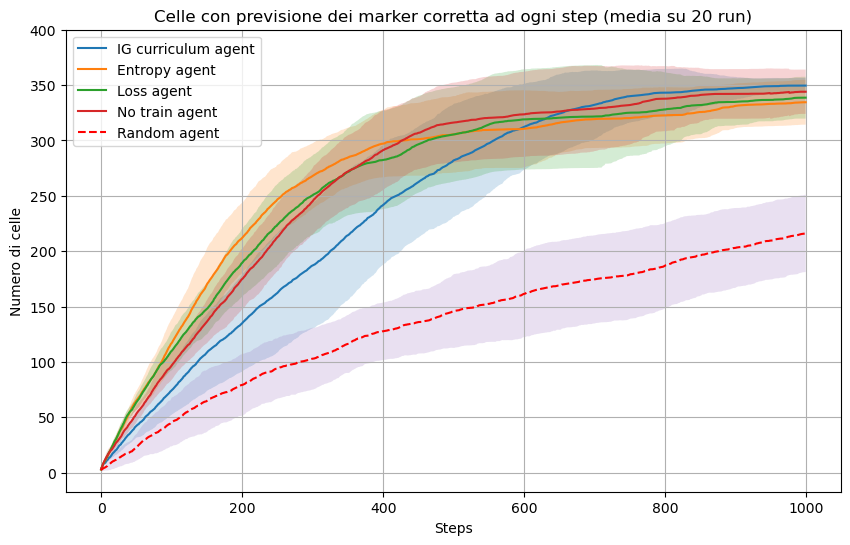

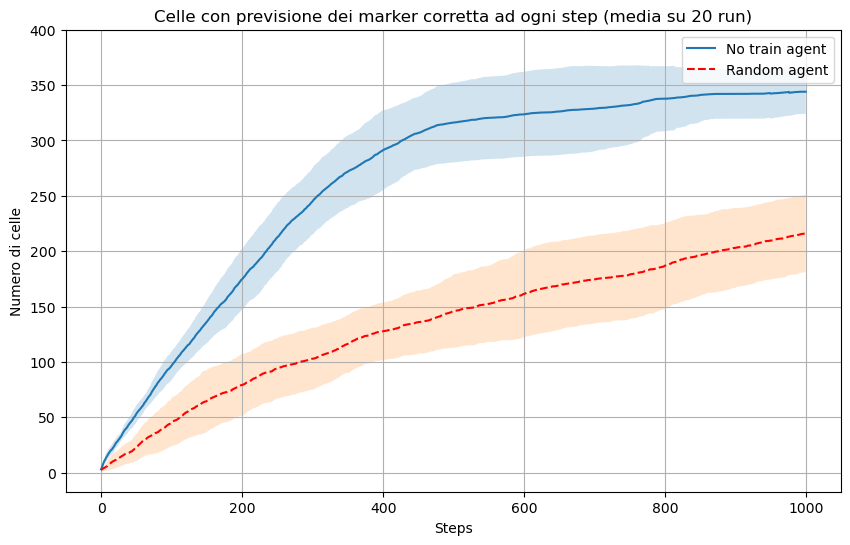

In [35]:
test_data_policy_best_pov = [test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_data_policy_best_pov_std = [test_data_entropy['cells_marker_pred_1_std'], test_data_loss['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

test_data_policy_ig = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_data_policy_ig_std = [test_data_ig_reward['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_data_policy_ig_curriculum_std = [test_data_ig_reward_curriculum['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

test_ig_vs_curriculum = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_ig_vs_curriculum_std = [test_data_ig_reward['cells_marker_pred_1_std'], test_data_ig_reward_curriculum['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

test_curriculum_vs_policy_best_pov = [test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_curriculum_vs_policy_best_pov_std = [test_data_ig_reward_curriculum['cells_marker_pred_1_std'], test_data_entropy['cells_marker_pred_1_std'], test_data_loss['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

test_policy_ig_vs_policy_best_pov = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_policy_ig_vs_policy_best_pov_std = [test_data_ig_reward['cells_marker_pred_1_std'], test_data_entropy['cells_marker_pred_1_std'], test_data_loss['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

test_curriculum_vs_policy_best_pov_vs_no_train = [test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_no_train['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_curriculum_vs_policy_best_pov_vs_no_train_std = [test_data_ig_reward_curriculum['cells_marker_pred_1_std'], test_data_entropy['cells_marker_pred_1_std'], test_data_loss['cells_marker_pred_1_std'], test_data_no_train['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

plot_metrics(test_data_policy_best_pov,
             data_std=test_data_policy_best_pov_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"], 
             marker=None,
             max_y=max_cells)

plot_metrics(test_data_policy_ig,
             data_std=test_data_policy_ig_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",legend_labels=["IG agent", "Random agent"], 
             marker=None,
             max_y=max_cells)

plot_metrics(test_policy_ig_vs_policy_best_pov,
             data_std=test_policy_ig_vs_policy_best_pov_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",
             legend_labels=["IG agent", "Entropy agent", "Loss agent", "Random agent"], 
             marker=None,
             max_y=max_cells)

plot_metrics(test_data_policy_ig_curriculum,
             data_std=test_data_policy_ig_curriculum_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",
             legend_labels=["IG curriculum agent", "Random agent"], 
             marker=None,
             max_y=max_cells)

plot_metrics(test_ig_vs_curriculum,
             data_std=test_ig_vs_curriculum_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",
             legend_labels=["IG agent", "IG curriculum agent", "Random agent"],
             marker=None,
             max_y=max_cells)

plot_metrics(test_curriculum_vs_policy_best_pov,
             data_std=test_curriculum_vs_policy_best_pov_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",
             legend_labels=["IG curriculum agent", "Entropy agent", "Loss agent", "Random agent"],
             marker=None,
             max_y=max_cells)

plot_metrics(test_curriculum_vs_policy_best_pov_vs_no_train,
             data_std=test_curriculum_vs_policy_best_pov_vs_no_train_std,
             title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
             ylabel="Numero di celle",
             xlabel="Steps",
             legend_labels=["IG curriculum agent", "Entropy agent", "Loss agent", "No train agent", "Random agent"],
             marker=None,
             max_y=max_cells)

test = [test_data_no_train['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_std = [test_data_no_train['cells_marker_pred_1_std'], test_data_random_agent['cells_marker_pred_1_std']]

plot_metrics(test,
                data_std=test_std,
                title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["No train agent", "Random agent"],
                marker=None,
                max_y=max_cells)

In [36]:
import numpy as np

def compute_avg_distance_per_run(position_runs, num_samples=1000):
    """
    Calcola la distanza media tra le posizioni visitate in ogni run.
    
    :param position_runs: Lista delle posizioni visitate per ogni run
    :param num_samples: Numero massimo di campioni da considerare per il calcolo della distanza
    :return: Lista delle distanze medie per ogni run
    """
    avg_distances = []
    for position_run in position_runs:
        if len(position_run) < 2:
            avg_distances.append(0)  # Se c'è una sola posizione, la distanza è zero
            continue
        
        samples = min(num_samples, len(position_run))
        sample_positions = np.random.choice(len(position_run), size=samples, replace=False)
        avg_distance = np.mean([
            np.linalg.norm(np.array(position_run[i]) - np.array(position_run[j]))
            for i in sample_positions for j in sample_positions if i != j
        ])
        avg_distances.append(avg_distance)
    
    return avg_distances

In [ ]:
# avg_distance_per_run_no_train = compute_avg_distance_per_run(test_data_no_train['total_position_per_run'])
# avg_distance_per_run_random = compute_avg_distance_per_run(test_data_random_agent['total_position_per_run'])
# avg_distance_per_run_entropy = compute_avg_distance_per_run(test_data_entropy['total_position_per_run'])
# avg_distance_per_run_loss = compute_avg_distance_per_run(test_data_loss['total_position_per_run'])
# avg_distance_per_run_ig = compute_avg_distance_per_run(test_data_ig_reward['total_position_per_run'])
# avg_distance_per_run_ig_curriculum = compute_avg_distance_per_run(test_data_ig_reward_curriculum['total_position_per_run'])

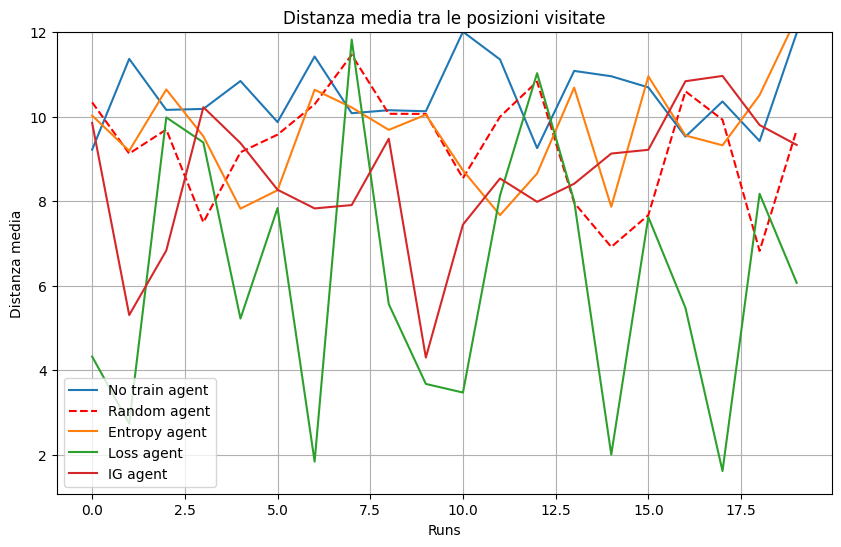

In [ ]:
data = [avg_distance_per_run_no_train, avg_distance_per_run_random, avg_distance_per_run_entropy, avg_distance_per_run_loss, avg_distance_per_run_ig]

plot_metrics(data,
             title="Distanza media tra le posizioni visitate",
             ylabel="Distanza media",
             xlabel="Runs",
             legend_labels=["No train agent", "Random agent", "Entropy agent", "Loss agent", "IG agent"],
             marker=None,
             max_y=max(avg_distance_per_run_no_train))

In [37]:
from collections import Counter

# frequenza celle visitate
# Se è bassa, l'agente sta visitando poche celle
# Se è alta, l'agente sta visitando molte celle
cells_visited_no_train = []
for position_run in test_data_no_train['total_position_per_run']:
    cell_visit_counts = Counter(tuple(pos) for pos in position_run)
    cells_visited_no_train.append(dict(cell_visit_counts))

cells_visited_random = []
for position_run in test_data_random_agent['total_position_per_run']:
    cell_visit_counts = Counter(tuple(pos) for pos in position_run)
    cells_visited_random.append(dict(cell_visit_counts))

cells_visited_entropy = []
for position_run in test_data_entropy['total_position_per_run']:
    cell_visit_counts = Counter(tuple(pos) for pos in position_run)
    cells_visited_entropy.append(dict(cell_visit_counts))

cells_visited_loss = []
for position_run in test_data_loss['total_position_per_run']:
    cell_visit_counts = Counter(tuple(pos) for pos in position_run)
    cells_visited_loss.append(dict(cell_visit_counts))

cells_visited_ig = []
for position_run in test_data_ig_reward['total_position_per_run']:
    cell_visit_counts = Counter(tuple(pos) for pos in position_run)
    cells_visited_ig.append(dict(cell_visit_counts))

cells_visited_ig_curriculum = []
for position_run in test_data_ig_reward_curriculum['total_position_per_run']:
    cell_visit_counts = Counter(tuple(pos) for pos in position_run)
    cells_visited_ig_curriculum.append(dict(cell_visit_counts))

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_visit_heatmap(grid_size, cells_visited, title, vmax=None):
    """
    Crea una heatmap che mostra la frequenza delle celle attraversate con un valore massimo di scala.
    
    Args:
    - grid_size (int): La dimensione della griglia (NxN).
    - cells_visited (list): Lista di dizionari contenenti le celle visitate durante le run.
    - title (str): Titolo della heatmap.
    - vmax (int, opzionale): Valore massimo per la scala della heatmap.
    """
    # Creazione di una matrice vuota per memorizzare le frequenze di visita
    visit_counts = np.zeros((grid_size, grid_size))

    # Aggregazione delle visite da tutte le run
    for run_visits in cells_visited:
        for (x, y), count in run_visits.items():
            if 0 <= x < grid_size and 0 <= y < grid_size:
                visit_counts[x-1, y-1] += count

    # media su run totali
    visit_counts /= len(cells_visited)
    # Creazione della heatmap con valore massimo opzionale
    plt.figure(figsize=(8, 6))
    sns.heatmap(visit_counts, cmap="viridis", annot=False, linewidths=0.5, cbar=True, vmax=vmax)

    plt.title(title)
    plt.show()


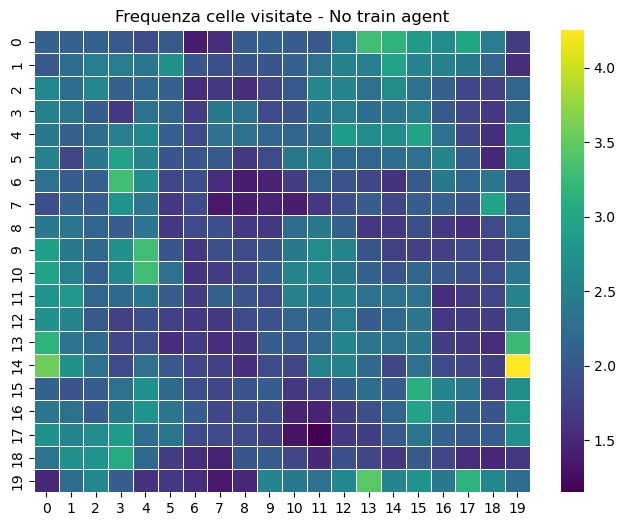

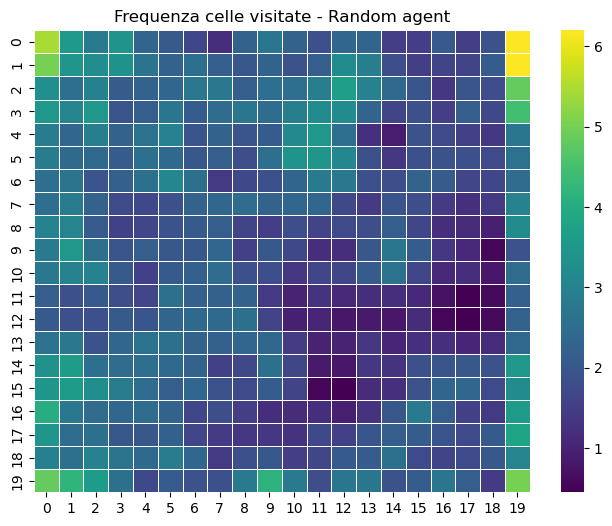

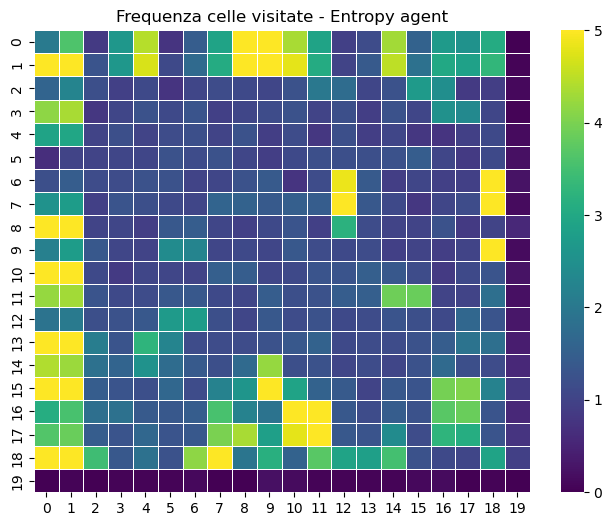

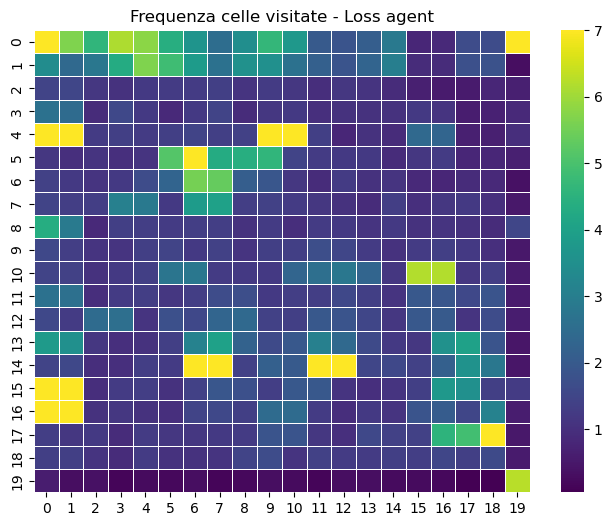

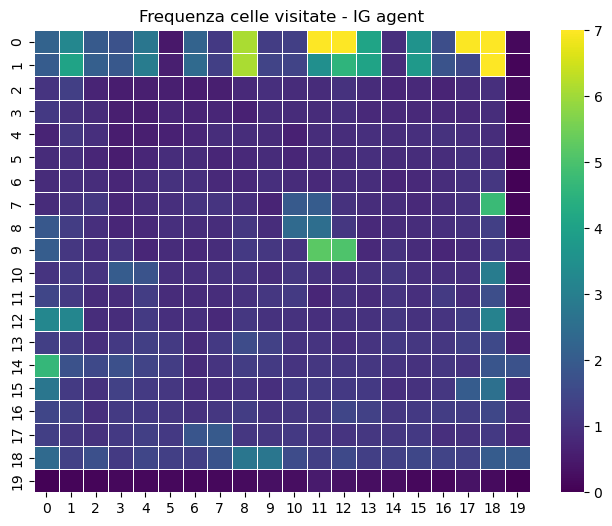

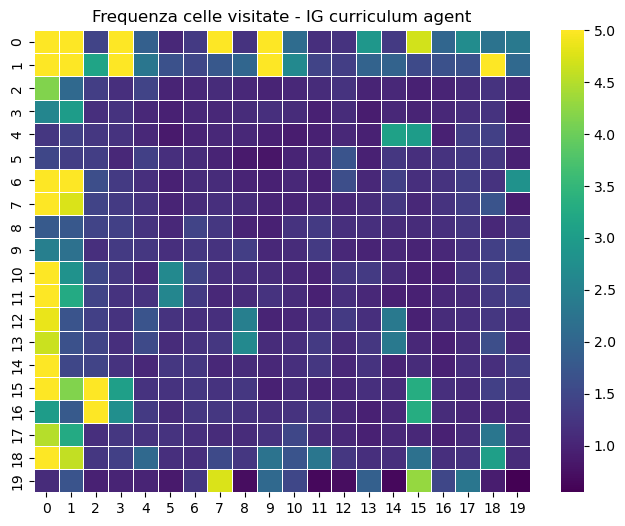

In [39]:
plot_visit_heatmap(grid_size=20, cells_visited=cells_visited_no_train, title="Frequenza celle visitate - No train agent")

plot_visit_heatmap(grid_size=20, cells_visited=cells_visited_random, title="Frequenza celle visitate - Random agent")

plot_visit_heatmap(grid_size=20, cells_visited=cells_visited_entropy, title="Frequenza celle visitate - Entropy agent", vmax=5)

plot_visit_heatmap(grid_size=20, cells_visited=cells_visited_loss, title="Frequenza celle visitate - Loss agent", vmax=7)

plot_visit_heatmap(grid_size=20, cells_visited=cells_visited_ig, title="Frequenza celle visitate - IG agent", vmax=7)

plot_visit_heatmap(grid_size=20, cells_visited=cells_visited_ig_curriculum, title="Frequenza celle visitate - IG curriculum agent", vmax=5)